In [1]:
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape

In [2]:
df = pd.read_csv("100419_main_input.csv", parse_dates = ['date'])
#df.head(10)

In [3]:
forecast_days = 30

In [4]:
# ORDER
# As we saw at [2.3. Data Analysis], the trend is linear (non-polynomial),
# hence to make the data stationary the difference order will be 1: D = 1
# To select P, we need to plot autocorrelation plots 

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

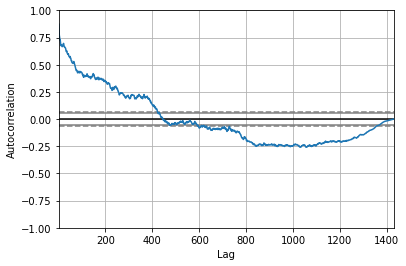

In [5]:
from pandas.plotting import autocorrelation_plot as ap
ap(df['price']) # daily lag correlation

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

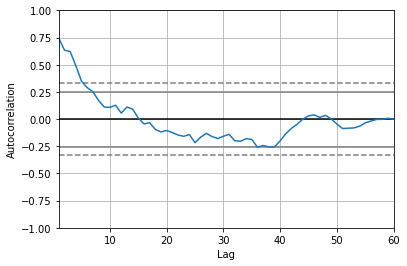

In [6]:
ap(df['price'][-60:]) # daily lag correlation - last 60 days

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf

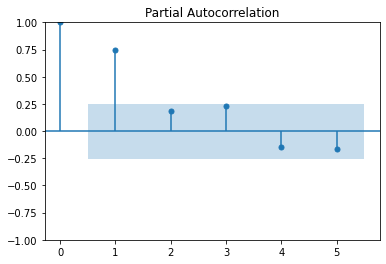

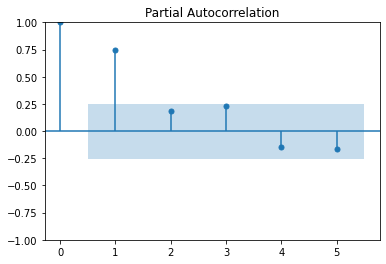

In [8]:
plot_pacf(df['price'][-60:], lags = 5)

In [9]:
order = (5, 1, 1)

In [10]:
# ARIMA MODEL
warnings.filterwarnings('ignore')
train, test = df[:df.shape[0]-forecast_days]['price'], df[df.shape[0]-forecast_days:]['price']
model = sm.tsa.arima.ARIMA(train, order=order)
model_fit = model.fit()

In [11]:
# model_fit.summary()

In [12]:
residuals = model_fit.resid

In [13]:
# residuals.plot()

In [14]:
yhat = model_fit.forecast(forecast_days)
yhat_pred = model_fit.predict()
yhat_full = pd.concat([yhat_pred, yhat])

<Axes: >

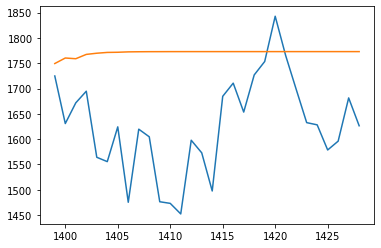

In [15]:
test.plot()
yhat.plot()

In [16]:
rmse_res = mse(test, yhat, squared = False)
round(rmse_res, 2)

171.81

In [17]:
mape_res = mape(test, yhat)
round(mape_res, 3)

0.094

Text(0, 0.5, 'price')

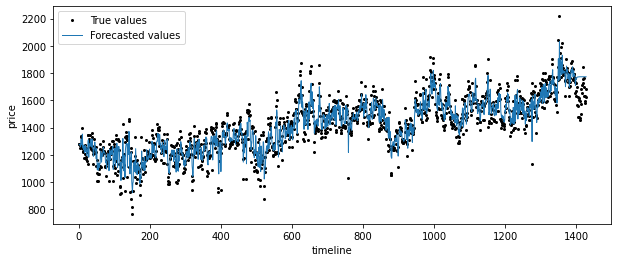

In [18]:
plt.figure(figsize=(10,4))
plt.plot(df['price'], 'o', label = "True values", color='black', markersize=2)
plt.plot(yhat_full[1:], label = "Forecasted values", linewidth = 1)
plt.legend()
plt.xlabel('timeline')
plt.ylabel('price')